In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# log_data

event_new	event description

SignUp	회원가입
OpenApp	핀다 앱 실행
Login	핀다 앱 로그인
ViewLoanApplyIntro	한도조회 인트로 페이지 조회
StartLoanApply	한도조회 시작하기 버튼 클릭
CompleteIDCertification	본인인증완료
EndLoanApply	한도조회 결과 확인
UseLoanManage	대출관리 서비스 이용
UsePrepayCalc	여윳돈 계산기 서비스 이용
UseDSRCalc	DSR 계산기 서비스 이용
GetCreditInfo	KCB 신용정보 조회

1. user_id 마다 다른 행위도 기록됨. 

2. mp_os가 android, Android 가 다르다. 대소문자 통일 필요

3. user_id를 sorting해서 같은 ID 별로 데이터를 구별한다.

In [42]:
#initial data

logdata = pd.read_csv("log_data.csv")
logdata.head(10)

,user_id,event,timestamp,mp_os,mp_app_version,date_cd
0,576409,StartLoanApply,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
1,576409,ViewLoanApplyIntro,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
2,72878,EndLoanApply,2022-03-25 11:14:44,Android,3.8.4,2022-03-25
3,645317,OpenApp,2022-03-25 11:15:09,iOS,3.6.1,2022-03-25
4,645317,UseLoanManage,2022-03-25 11:15:11,iOS,3.6.1,2022-03-25
5,640185,UseLoanManage,2022-03-25 11:41:53,iOS,3.6.1,2022-03-25
6,640185,ViewLoanApplyIntro,2022-03-25 11:42:38,iOS,3.6.1,2022-03-25
7,640185,UsePrepayCalc,2022-03-25 11:43:07,iOS,3.6.1,2022-03-25
8,640185,UseLoanManage,2022-03-25 11:43:57,iOS,3.6.1,2022-03-25
9,640185,UseLoanManage,2022-03-25 11:44:04,iOS,3.6.1,2022-03-25


In [8]:
logdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17843993 entries, 0 to 17843992
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         int64 
 1   event           object
 2   timestamp       object
 3   mp_os           object
 4   mp_app_version  object
 5   date_cd         object
dtypes: int64(1), object(5)
memory usage: 816.8+ MB


In [34]:
logdata['mp_os'].value_counts()

Android    12331688
iOS         3312862
android     2195434
iPadOS         3029
Name: mp_os, dtype: int64

In [12]:
event_count = logdata['event'].value_counts()

OpenApp                    3460762
EndLoanApply               2715253
GetCreditInfo              2661997
Login                      2463755
StartLoanApply             1893914
ViewLoanApplyIntro         1804712
UseLoanManage              1558906
CompleteIDCertification    1237777
SignUp                       34892
UsePrepayCalc                 7360
UseDSRCalc                    4665
Name: event, dtype: int64

In [43]:
#mp_os 칼럼의 타입을 문자열로 변환

logdata['mp_os'] = logdata['mp_os'].astype('string')
logdata.dtypes

user_id            int64
event             object
timestamp         object
mp_os             string
mp_app_version    object
date_cd           object
dtype: object

In [44]:
logdata['mp_os'] = logdata['mp_os'].str.upper()

In [45]:
logdata['mp_os'][:]

0           ANDROID
1           ANDROID
2           ANDROID
3               IOS
4               IOS
             ...   
17843988    ANDROID
17843989    ANDROID
17843990    ANDROID
17843991    ANDROID
17843992    ANDROID
Name: mp_os, Length: 17843993, dtype: string

In [46]:
logdata['mp_os'].value_counts()

ANDROID    14527122
IOS         3312862
IPADOS         3029
Name: mp_os, dtype: Int64

In [49]:
#ID 별로 정렬
print(logdata['user_id'].sort_values())

7071607          1
2451693          1
2451691          1
11709374         1
11709372         1
             ...  
7298672     879696
7298666     879696
8248082     879698
8248080     879698
8248077     879698
Name: user_id, Length: 17843993, dtype: int64


In [55]:
print(logdata.sort_values('user_id').head())

7071607     1
2451693     1
2451691     1
11709374    1
11709372    1
Name: user_id, dtype: int64


# loanresult


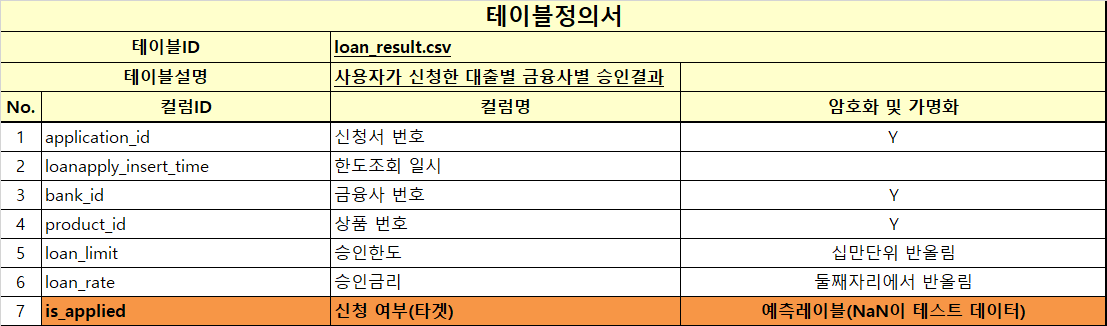

1. application_id 와 bank_id, product_id 의 관련성은 없어보임.

2. product_id가 같더라도 loan_limit, loan_rate는 다름

3. loan_rate와 is_applied 에 직접적인 관계가 있을까?
-> 낮은 rate일수록 

4. application_id는 같지만, is_applied가 다른 경우-> 왜 다른 상품은 선택하지 않았고 그 상품을 선택했는가?
is_applied가 결국 0인 경우 -> 왜 대출 신청으로 이어지지 않았는가?


In [4]:
loanresult = pd.read_csv("loan_result.csv")
loanresult.head()

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN


In [5]:
loanresult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13527363 entries, 0 to 13527362
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   application_id         int64  
 1   loanapply_insert_time  object 
 2   bank_id                int64  
 3   product_id             int64  
 4   loan_limit             float64
 5   loan_rate              float64
 6   is_applied             float64
dtypes: float64(3), int64(3), object(1)
memory usage: 722.4+ MB


In [7]:
print(loanresult.sort_values('product_id'))

         application_id loanapply_insert_time  bank_id  product_id  \
8266766          373620   2022-03-30 12:21:00        1           1   
9383868          560370   2022-06-08 17:23:54        1           1   
4334313         1145673   2022-04-01 16:10:18        1           1   
3278430         1292959   2022-03-29 10:56:53        1           1   
9420947          435762   2022-06-08 23:15:06        1           1   
...                 ...                   ...      ...         ...   
6712140          918825   2022-03-08 13:29:07        8         270   
6712015         1232175   2022-03-08 22:57:28        8         270   
2799645         1487725   2022-06-08 15:43:19        8         270   
6711235         1223816   2022-05-10 01:53:44        8         270   
9937231         1375008   2022-06-02 21:35:36        8         270   

         loan_limit  loan_rate  is_applied  
8266766  50000000.0       10.9         0.0  
9383868  99000000.0        8.9         NaN  
4334313   3000000.0     

loanresult의 is_applied 가 범주형으로 구분될 수 있게 자료형태를 바꿔줄 것. 0에서 NaN을 어떻게 따로 뺄 것 인가

test_data와 train_data는 3~5월 / 6월 즉 날짜를 기준으로 나눌 것.

## train&test data = 10270124

3,4월을 트레이닝 데이터, 5월을 테스트 데이터로 나누면 좋을 듯.

구분해 봐야 됨.


## target data = 3257239

In [24]:

loanresult['is_applied'] = loanresult['is_applied'].astype('float64')
loanresult.dtypes

application_id             int64
loanapply_insert_time     object
bank_id                    int64
product_id                 int64
loan_limit               float64
loan_rate                float64
is_applied               float64
dtype: object

In [26]:
loanresult['is_applied'].value_counts()

0.0    9709675
1.0     560449
Name: is_applied, dtype: int64

In [29]:
print(loanresult.sort_values('loanapply_insert_time'))

         application_id loanapply_insert_time  bank_id  product_id  \
754902           566528   2022-03-01 00:11:36       13         123   
1116695          180433   2022-03-01 00:12:05       13         262   
1116692          180433   2022-03-01 00:12:05       19         231   
2660438         1657888   2022-03-01 00:12:06       19         231   
2660440         1657888   2022-03-01 00:12:06       24         263   
...                 ...                   ...      ...         ...   
9024947          634459   2022-06-30 23:54:48       10          65   
9024951          634459   2022-06-30 23:54:48       10         149   
9024953          634459   2022-06-30 23:54:48       19         231   
8983167         1288711   2022-06-30 23:54:52       35         267   
8983165         1288711   2022-06-30 23:55:00       27         176   

         loan_limit  loan_rate  is_applied  
754902   20000000.0       19.1         0.0  
1116695  22000000.0       16.6         0.0  
1116692  16000000.0     

In [31]:
loanresult_sorted = loanresult.sort_values('loanapply_insert_time')

application_id                        506292
loanapply_insert_time    2022-06-01 00:12:24
bank_id                                   27
product_id                               148
loan_limit                        13000000.0
loan_rate                                7.2
is_applied                               NaN
Name: 6688733, dtype: object

In [32]:
loanresult_sorted.iloc[10270123]

application_id                        831190
loanapply_insert_time    2022-05-31 23:54:38
bank_id                                   52
product_id                               187
loan_limit                         2000000.0
loan_rate                                9.5
is_applied                               0.0
Name: 688645, dtype: object

# Train, Test, Target data 구분하기

In [34]:
finda_target = loanresult_sorted.iloc[10270124:]
finda_target.head(5)

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
6688733,506292,2022-06-01 00:12:24,27,148,13000000.0,7.2,NaN
6688731,506292,2022-06-01 00:12:24,59,251,11000000.0,6.8,NaN
6632021,1255231,2022-06-01 00:12:24,29,265,19000000.0,11.4,NaN
6688727,506292,2022-06-01 00:12:24,19,231,24000000.0,15.6,NaN
6688728,506292,2022-06-01 00:12:25,56,5,2000000.0,18.5,NaN


In [38]:
loanresult_sorted.iloc[6800000]

application_id                        853961
loanapply_insert_time    2022-05-02 11:25:25
bank_id                                   13
product_id                               262
loan_limit                        44000000.0
loan_rate                               20.0
is_applied                               0.0
Name: 11197874, dtype: object

In [60]:
train_data = loanresult_sorted.iloc[:10270124]
train_data

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
754902,566528,2022-03-01 00:11:36,13,123,20000000.0,19.1,0.0
1116695,180433,2022-03-01 00:12:05,13,262,22000000.0,16.6,0.0
1116692,180433,2022-03-01 00:12:05,19,231,16000000.0,15.0,0.0
2660438,1657888,2022-03-01 00:12:06,19,231,40000000.0,18.9,0.0
2660440,1657888,2022-03-01 00:12:06,24,263,5000000.0,15.9,0.0
...,...,...,...,...,...,...,...
1386475,455157,2022-05-31 23:54:28,35,168,3000000.0,18.3,0.0
1386485,455157,2022-05-31 23:54:28,55,159,3000000.0,18.9,0.0
1386489,455157,2022-05-31 23:54:29,22,221,5000000.0,18.4,0.0
1386479,455157,2022-05-31 23:54:37,38,16,3000000.0,14.5,0.0


In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

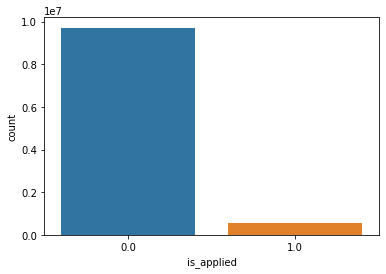

In [68]:
sns.countplot(x = "is_applied", data = train_data)
plt.show()

C:\Users\jsanghoo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\jsanghoo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


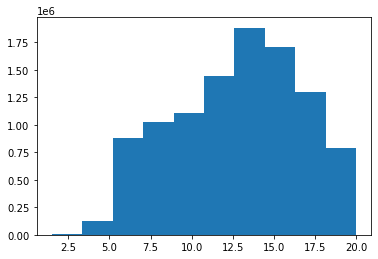

In [76]:
plt.hist(x = train_data["loan_rate"], bins = 10)
plt.show()

In [78]:
NotApp = train_data[train_data["is_applied"] == 0]
NotApp

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
754902,566528,2022-03-01 00:11:36,13,123,20000000.0,19.1,0.0
1116695,180433,2022-03-01 00:12:05,13,262,22000000.0,16.6,0.0
1116692,180433,2022-03-01 00:12:05,19,231,16000000.0,15.0,0.0
2660438,1657888,2022-03-01 00:12:06,19,231,40000000.0,18.9,0.0
2660440,1657888,2022-03-01 00:12:06,24,263,5000000.0,15.9,0.0
...,...,...,...,...,...,...,...
1386475,455157,2022-05-31 23:54:28,35,168,3000000.0,18.3,0.0
1386485,455157,2022-05-31 23:54:28,55,159,3000000.0,18.9,0.0
1386489,455157,2022-05-31 23:54:29,22,221,5000000.0,18.4,0.0
1386479,455157,2022-05-31 23:54:37,38,16,3000000.0,14.5,0.0


In [79]:
App = train_data[train_data["is_applied"] == 1]
App

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
1116693,180433,2022-03-01 00:12:06,21,196,3000000.0,10.9,1.0
2660439,1657888,2022-03-01 00:12:07,21,196,4000000.0,10.9,1.0
612684,1875716,2022-03-01 00:12:30,21,196,3000000.0,12.9,1.0
611481,229151,2022-03-01 00:12:39,30,85,8000000.0,18.3,1.0
611482,229151,2022-03-01 00:12:39,38,134,11000000.0,7.2,1.0
...,...,...,...,...,...,...,...
396111,508044,2022-05-31 23:46:42,35,192,5000000.0,15.6,1.0
5632963,1921911,2022-05-31 23:47:28,4,268,21000000.0,5.7,1.0
5737714,475256,2022-05-31 23:48:04,4,268,22000000.0,13.4,1.0
5696413,1015795,2022-05-31 23:50:29,9,105,3000000.0,5.4,1.0


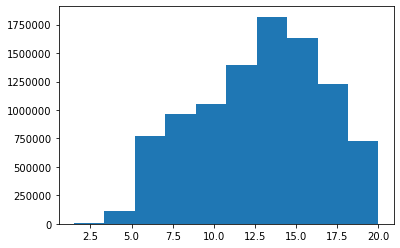

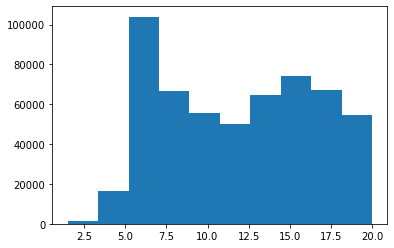

In [83]:
plt.hist(x = NotApp["loan_rate"], bins = 10)
plt.ticklabel_format(style='plain')
plt.show()
plt.hist(x = App["loan_rate"], bins = 10)
plt.show()

In [84]:
train_data.sort_values('application_id')

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
10972628,1,2022-05-06 11:05:56,38,16,19000000.0,17.1,0.0
10972627,1,2022-05-06 11:05:57,62,200,8000000.0,14.8,0.0
10972632,1,2022-05-06 11:05:42,59,150,19000000.0,17.7,0.0
10972629,1,2022-05-06 11:05:43,38,223,19000000.0,17.1,0.0
10972631,1,2022-05-06 11:05:43,50,142,18000000.0,19.9,0.0
...,...,...,...,...,...,...,...
9732105,2167826,2022-03-25 11:57:51,22,221,13000000.0,17.4,1.0
9732107,2167826,2022-03-25 11:57:49,30,85,5000000.0,18.7,0.0
9732108,2167826,2022-03-25 11:57:49,35,168,20000000.0,19.9,0.0
9732106,2167826,2022-03-25 11:57:49,38,223,22000000.0,16.9,0.0


# userspec

## 결측치

- birth_year, gender 결측치 12,961개: 하나만 없는 경우 X, 둘 다 없음. 
(변수가 고려대상이 아니라면 삭제할 필요 없음. 고려대상이라면 삭제 후 진행)

- 신용점수 (credit_score) 105,115개 결측치

- yearly_income, income_type, employment~ 결측행 개수가 적음 => 제거

In [41]:
userspec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394216 entries, 0 to 1394215
Data columns (total 17 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   application_id                       1394216 non-null  int64  
 1   user_id                              1394216 non-null  int64  
 2   birth_year                           1381255 non-null  float64
 3   gender                               1381255 non-null  float64
 4   insert_time                          1394216 non-null  object 
 5   credit_score                         1289101 non-null  float64
 6   yearly_income                        1394126 non-null  float64
 7   income_type                          1394131 non-null  object 
 8   company_enter_month                  1222456 non-null  float64
 9   employment_type                      1394131 non-null  object 
 10  houseown_type                        1394131 non-null  object 
 11

In [40]:
userspec = pd.read_csv("user_spec.csv")
userspec.head()

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,20151101.0,기타,자가,1000000.0,기타,0.0,NaN,4.0,162000000.0
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,0.0,NaN,5.0,15000000.0
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,0.0,NaN,7.0,344000000.0
4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0


In [51]:
userspec.replace(np.nan, "None", inplace = True)

In [58]:
userspec[(userspec["birth_year"] == "None") & (userspec["gender"] == "None")]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
253,132643,49072,None,None,2022-04-20 19:47:49,560.0,32000000.0,OTHERINCOME,None,기타,기타가족소유,10000000.0,대환대출,None,None,5.0,45000000.0
507,1093354,77317,None,None,2022-03-29 14:06:02,540.0,6000000.0,EARNEDINCOME2,202107.0,계약직,기타가족소유,5000000.0,생활비,None,None,None,None
891,954344,364670,None,None,2022-03-19 21:05:28,950.0,10000000.0,PRIVATEBUSINESS,202005.0,정규직,기타가족소유,20000000.0,사업자금,None,None,None,None
979,1082273,587345,None,None,2022-05-31 09:58:59,None,15000000.0,EARNEDINCOME,202103.0,정규직,전월세,20000000.0,생활비,0.0,0.0,None,None
1038,2100576,744785,None,None,2022-03-29 16:44:04,740.0,34000000.0,EARNEDINCOME,202109.0,정규직,기타가족소유,40000000.0,기타,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393578,1496444,239255,None,None,2022-04-27 01:07:48,None,30000000.0,FREELANCER,202204.0,기타,전월세,7000000.0,생활비,0.0,0.0,None,None
1393587,1824869,433763,None,None,2022-04-27 13:40:54,None,24000000.0,OTHERINCOME,None,기타,전월세,24000000.0,대환대출,0.0,None,None,None
1393649,471527,397914,None,None,2022-04-27 00:47:58,520.0,28000000.0,EARNEDINCOME,202202.0,정규직,기타가족소유,12000000.0,생활비,0.0,None,5.0,15000000.0
1393786,809359,570962,None,None,2022-04-18 23:15:37,880.0,24000000.0,OTHERINCOME,None,기타,기타가족소유,10000000.0,생활비,None,None,1.0,None
